Homework02

In [319]:
import numpy as np
import matplotlib.pyplot as plt


In [320]:
# define the activation function: sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [321]:
# the derivative of the activation function
def sigmoidprime(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [322]:
# four possible input pairs of (x1,x2)
possible_inputs = np.array([[0,0],[0,1],[1,0],[1,1]])

# target
t_xor = np.array([0,1,1,0])

#### Implement Perceptron.

In [323]:
# implement the perceptron class

class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        
        # Initialize random weights and a random bias term
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        # Define the learning rate as 1
        self.alpha = 1
        
        # initialize the variable for later use
        self.inputs = 0 
        self.weighted_sum = 0
        
    def forward_step(self, inputs):
        # Perform a perceptron forward step:
        self.inputs = inputs
                  
        # 1. Calculate the drive (use @ as a matrix multiplication command)
        self.weighted_sum =  self.weights @ inputs + self.bias 
        # An alternative would be:
        # weighted_sum =  np.dot(inputs, self.weights) + self.bias

        # 2. Return the activation
        return sigmoid(self.weighted_sum)
    
    def update(self, delta):
        
        # calculate the weight updates
        gradient_weights = delta * self.inputs
        self.weights -= self.alpha * gradient_weights
        # calculate the bias updates
        self.bias -= self.alpha * delta

Implement MLP

In [324]:
# implement Multi-Layer Perceptron class which can perform a forward and backprop-step

class MLP():
    def __init__(self):
        # initialize 4 perceptrons of the hidden layer
        self.h_layer = [Perceptron(2), Perceptron(2), Perceptron(2), Perceptron(2)]
        
        # initialize the output neuron
        self.out_neuron = Perceptron(4)
        
        # initialize a variable self.output to store the output
        self.output = 0
    
    def forward_step(self, inputs):
        
        # create an empty list
        activations = []
        
        # compute the activation for every perceptron in hidden layer iteratively      
        for perceptron in self.h_layer:
            # store the values in the activations list
            activations.append(perceptron.forward_step(inputs))
        
        # convert the activations list into an array
        activaitons = np.array(activations)
        
        # reshape the resulting array to feed it to the output neuron
        activations = np.reshape(activations, newshape = (-1))
        
        # feed the activations of the hidden layer into the output layer
        # store it in self.output
        self.output = self.out_neuron.forward_step(activations)
        
    
    def backprop_step(self, inputs, target):
        # get the delta for the output neuron
        delta_output = (self.output - target) * sigmoidprime(self.out_neuron.weighted_sum)
        # update
        self.out_neuron.update(delta_output)
#        hidden_deltas = [delta_output * sigmoidprime(p.weighted_sum) * self.out_neuron.weights[i] for i, p in enumerate(self.h_layer)]
        # Update the parameters for all four neurons in the hidden layer.
#        for i,p in enumerate(self.h_layer):
#            p.update(hidden_deltas[i])
        # an empty list for storing the delta values of the hidden layer
        delta_h = []
        # for each perceptron in the hidden layer
        for i, p in enumerate(self.h_layer):
            # compute the delta value and add it to the list
            delta_h.append(delta_output * sigmoidprime(p.weighted_sum) * self.out_neuron.weights[i])
            # update the value for the neuron
            p.update(delta_h[i])
     
    

In [335]:
# Training
# initialize the MLP
mlp = MLP()

# initialize list to store performance
accuracies = []
losses = []
epochs = []

# train for 1000 epochs
for i in range(1000):
    # keep track of the steps
    epochs.append(i)
    
    my_accuracy = 0
    my_loss = 0
    
    
    for n in range(4):
        input = possible_inputs[n]
        target = t_xor[n]
        
        mlp.forward_step(input)
        mlp.backprop_step(input, target)
        
        my_accuracy += int(int(mlp.output >= 0.5) == target)
        my_loss += (target - mlp.output) ** 2
    
    accuracy = my_accuracy/4
    accuracies.append(accuracy)
    losses.append(my_loss)
        

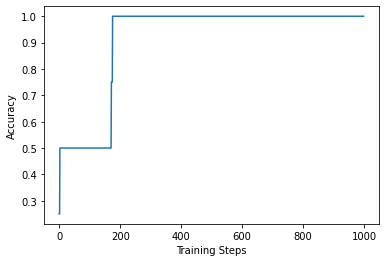

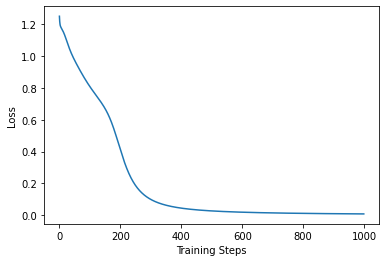

In [336]:
plt.figure()
plt.plot(epochs,accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.show()

plt.figure()
plt.plot(epochs,losses)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.show()

